### Imports

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import scipy.stats as stats
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from datetime import datetime, date
import math
import random

pd.set_option('display.max_columns', None)


In [24]:
years = pd.read_csv('https://raw.githubusercontent.com/Aser-Abdelfatah/Portugal-Wildfire-Clustering/main/Portugal_Dataset_Extraction/data/data_meteorological.csv', index_col=None)
years = years.drop(columns=[ 'Unnamed: 0'])
years

x      y        time      aspect  burned_areas   curvature  \
0     -9.48  38.76  2018-10-05  218.323290           1.0 -13973.8610   
1     -9.48  38.77  2018-10-05  238.144700           1.0   4664.3843   
2     -9.47  38.73  2018-10-05  285.109130           1.0  -2931.3470   
3     -9.47  38.74  2018-10-05  258.798920           1.0  -5164.5044   
4     -9.47  38.75  2018-10-05  234.107250           1.0  -6697.9670   
...     ...    ...         ...         ...           ...         ...   
29732 -6.22  41.55  2013-08-21  106.000244           1.0  -7686.9326   
29733 -6.22  41.55  2017-06-19  106.000244           1.0  -7686.9326   
29734 -6.22  41.56  2013-08-21  105.252884           1.0  -2599.2126   
29735 -6.22  41.56  2017-06-19  105.252884           1.0  -2599.2126   
29736 -6.22  41.57  2017-06-19  146.803330           1.0   6791.2900   

             d2m         dem  ignition_points  lai  lc_agriculture  lc_forest  \
0            NaN   22.818422              0.0  NaN        0.061867   0.358775   
1            NaN  212.681440              0.0  3.7        0.222479   0.501165   
2            NaN   22.934958              0.0  NaN        0.094327   0.289674   
3            NaN   18.108190              0.0  NaN        0.055267   0.467525   
4            NaN   34.618267              0.0  NaN        0.077921   0.610518   
...          ...         ...              ...  ...             ...        ...   
29732  283.89166  656.406300              0.0  0.9        0.221780   0.177264   
29733  287.92040  656.406300              0.0  1.0        0.221780   0.177264   
29734  283.87665  674.455300              0.0  1.3        0.560966   0.105398   
29735  287.89407  674.455300              0.0  1.5        0.560966   0.105398   
29736  287.86774  759.976700              0.0  0.7        0.500783   0.000000   

       lc_grassland  lc_settlement  lc_shrubland  lc_sparse_vegetation  \
0          0.000000       0.000000      0.034659              0.000000   
1          0.000000       0.037123      0.201721              0.000000   
2          0.000000       0.299544      0.000000              0.150371   
3          0.110535       0.000000      0.000000              0.087259   
4          0.012849       0.000000      0.000000              0.000000   
...             ...            ...           ...                   ...   
29732      0.000000       0.000000      0.600956              0.000000   
29733      0.000000       0.000000      0.600956              0.000000   
29734      0.000000       0.000000      0.333636              0.000000   
29735      0.000000       0.000000      0.333636              0.000000   
29736      0.000000       0.000000      0.499217              0.000000   

       lc_water_bodies  lc_wetland    lst_day  lst_night    ndvi  population  \
0             0.441838    0.102861        NaN        NaN     NaN    1.502658   
1             0.000000    0.037511  301.22000     291.50  0.5433   54.910294   
2             0.166084    0.000000  302.18000     289.72  0.3559   20.905184   
3             0.279414    0.000000        NaN     289.94     NaN    4.693551   
4             0.298713    0.000000        NaN        NaN     NaN    1.748590   
...                ...         ...        ...        ...     ...         ...   
29732         0.000000    0.000000  314.25998     294.18  0.3945    0.017831   
29733         0.000000    0.000000        NaN        NaN  0.4800    0.017911   
29734         0.000000    0.000000  313.75998     293.74  0.4620    0.000000   
29735         0.000000    0.000000        NaN        NaN  0.5225    0.000000   
29736         0.000000    0.000000        NaN        NaN  0.3649    0.000000   

             rh  roads_distance     slope      smi         sp        ssrd  \
0           NaN           0.000  1.558401  0.13765        NaN         NaN   
1           NaN           0.172  1.557888  0.13765        NaN         NaN   
2           NaN           0.000  1.537272  0.15544        NaN         NaN   
3           Na

### Data Visualization

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\2153200512.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\2153200512.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


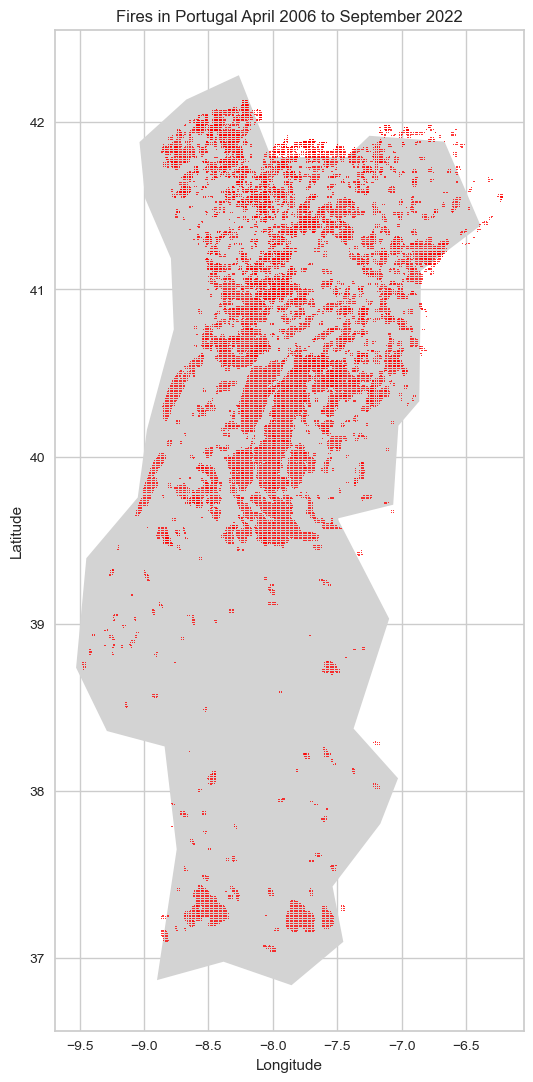

In [7]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()
#countries[countries["name"] == "Portugal"].plot(color="lightgrey")


# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey", ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years.plot(x="x", y="y", kind="scatter", 
        c="red", colormap="YlOrRd",  s= 0.15, figsize=(20,13),
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\960648840.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


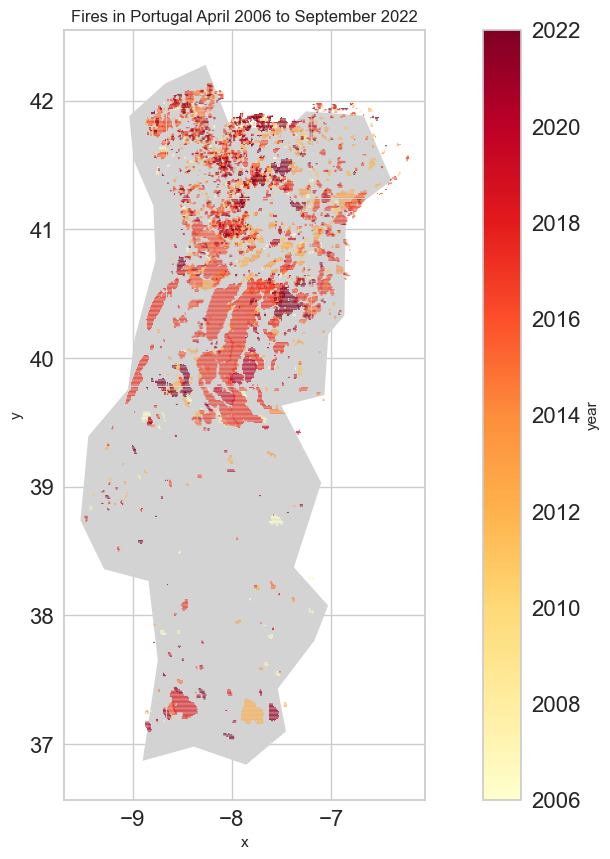

In [48]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years.plot(x="x", y="y", kind="scatter", 
        c="year", colormap="YlOrRd",  s= 0.15,
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
plt.show()

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\1561978318.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


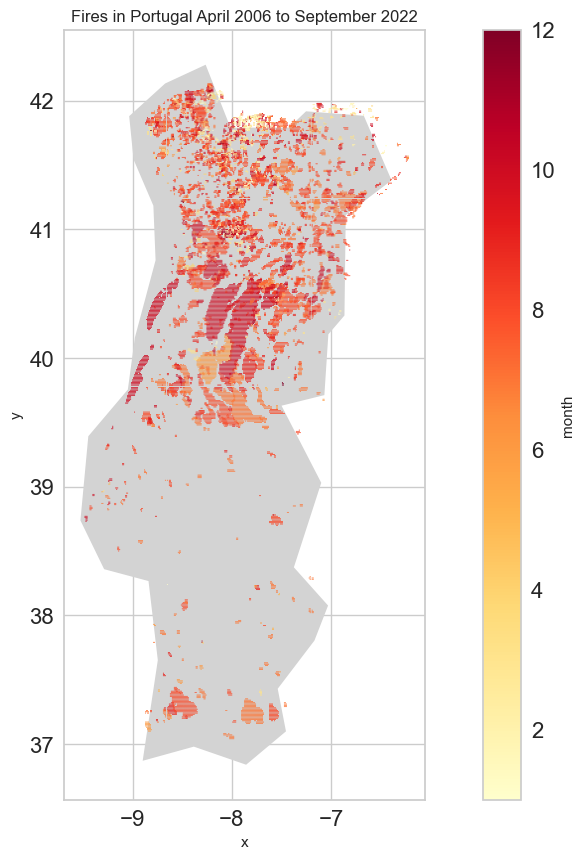

In [56]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years.plot(x="x", y="y", kind="scatter", 
        c="month", colormap="YlOrRd",  s= 0.15,
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
plt.show()

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\2076940634.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


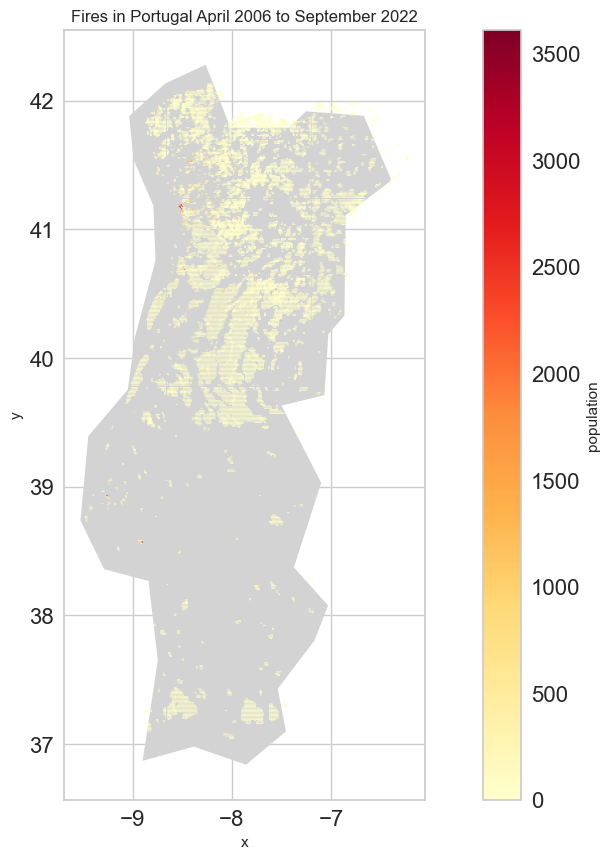

In [55]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years.plot(x="x", y="y", kind="scatter", 
        c="population", colormap="YlOrRd",  s= 0.15,
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
plt.show()

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\2227436643.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


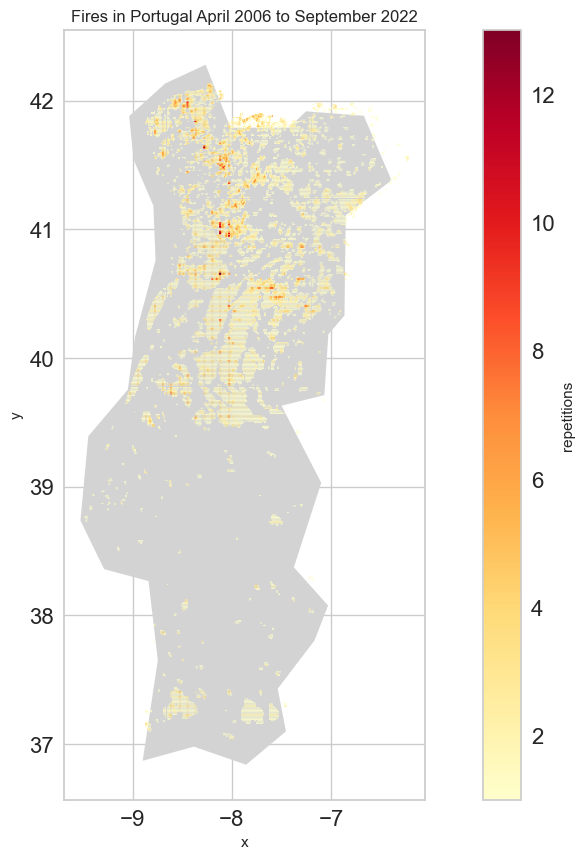

In [49]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years.plot(x="x", y="y", kind="scatter", 
        c="repetitions", colormap="YlOrRd",  s= 0.15,
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
plt.show()

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\3067890316.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


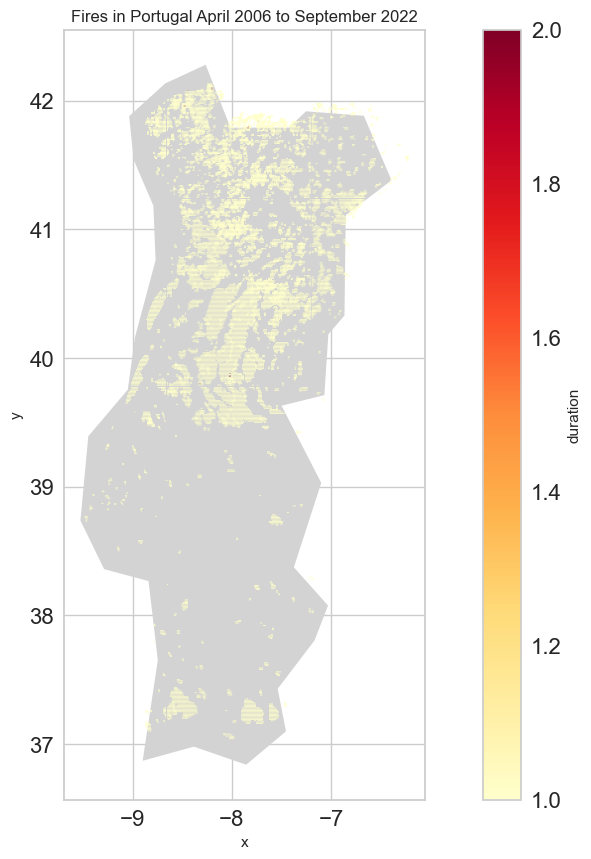

In [54]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years.plot(x="x", y="y", kind="scatter", 
        c="duration", colormap="YlOrRd",  s= 0.15,
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
plt.show()

Fire Duration is not very useful since the vast majority of fires lasted for 1 day. The data doesn't accurately capture duration. We should likely drop this feature from our analysis.

In [25]:
cols = years.columns.to_list()
cols.remove('time')

In [26]:
normalized_df=(years-years.mean())/years.std()

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\4064028648.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalized_df=(years-years.mean())/years.std()
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\4064028648.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalized_df=(years-years.mean())/years.std()


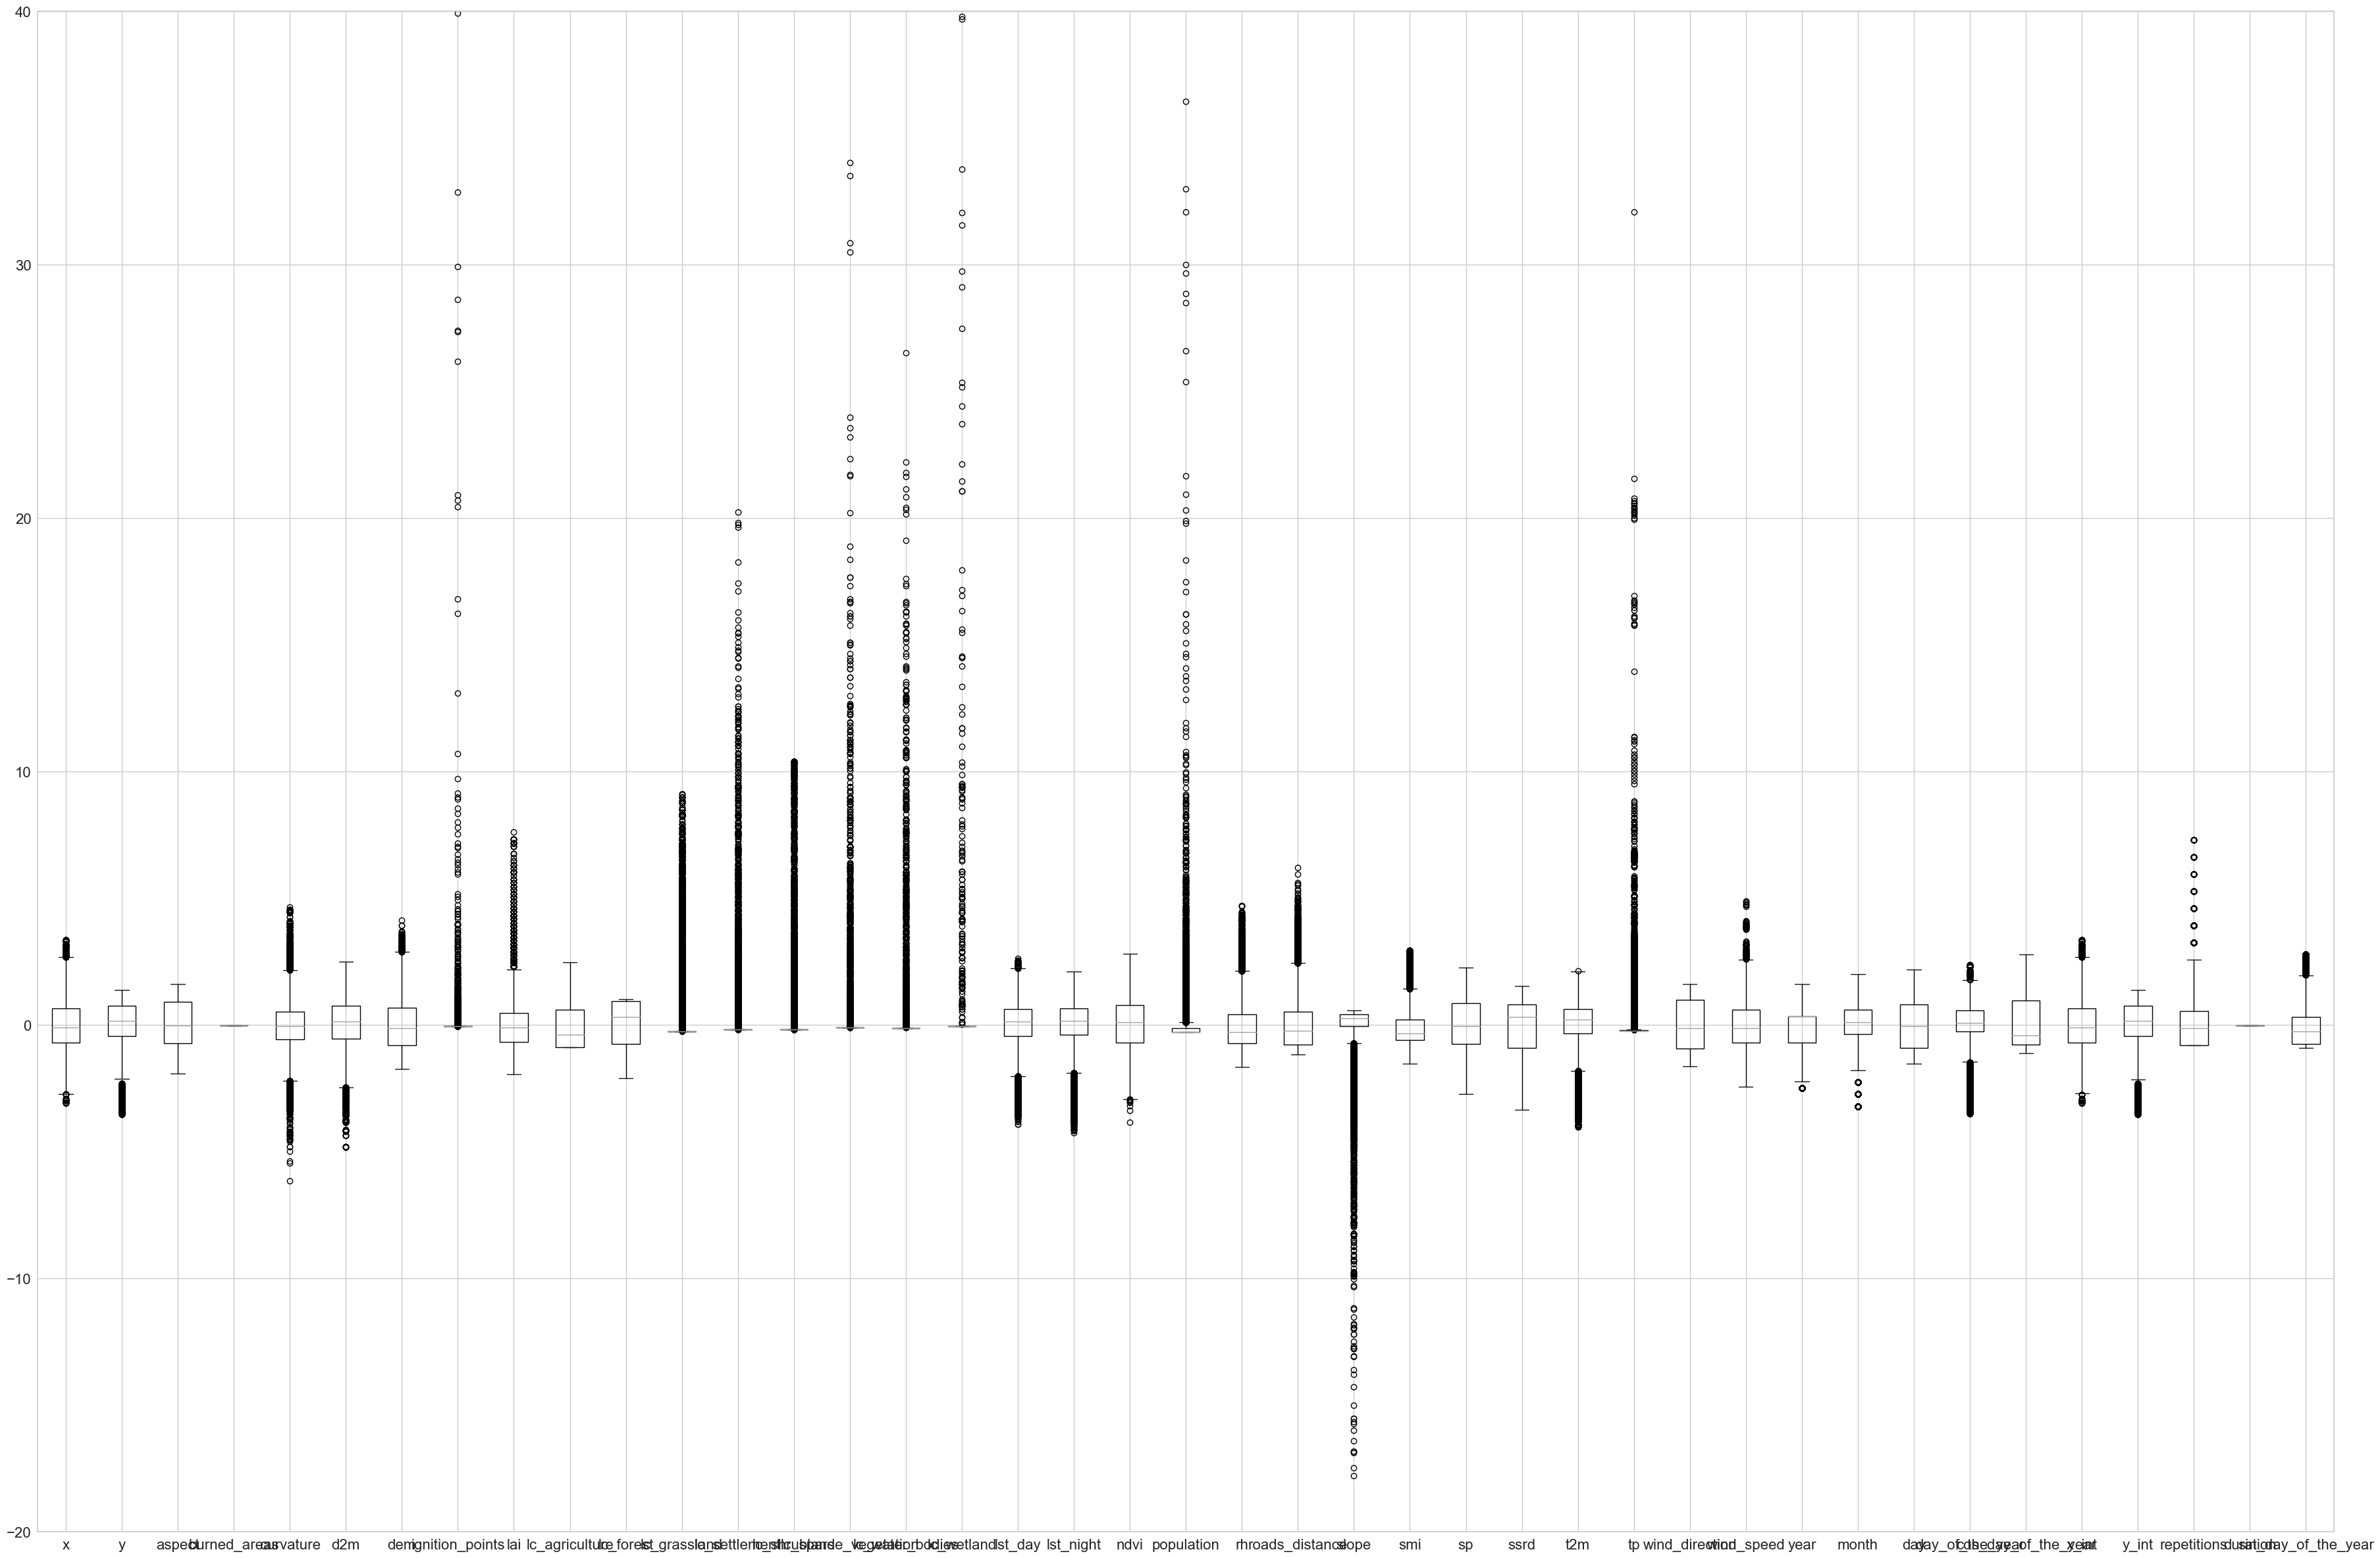

In [27]:
plt.figure(figsize=(45,30))
font = {'size'   : 15}
plt.ylim(-20, 40)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('font', **font)
boxplot = normalized_df.boxplot(column=cols)
plt.show()


C:\Users\asera\AppData\Local\Temp\ipykernel_23292\3067098004.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


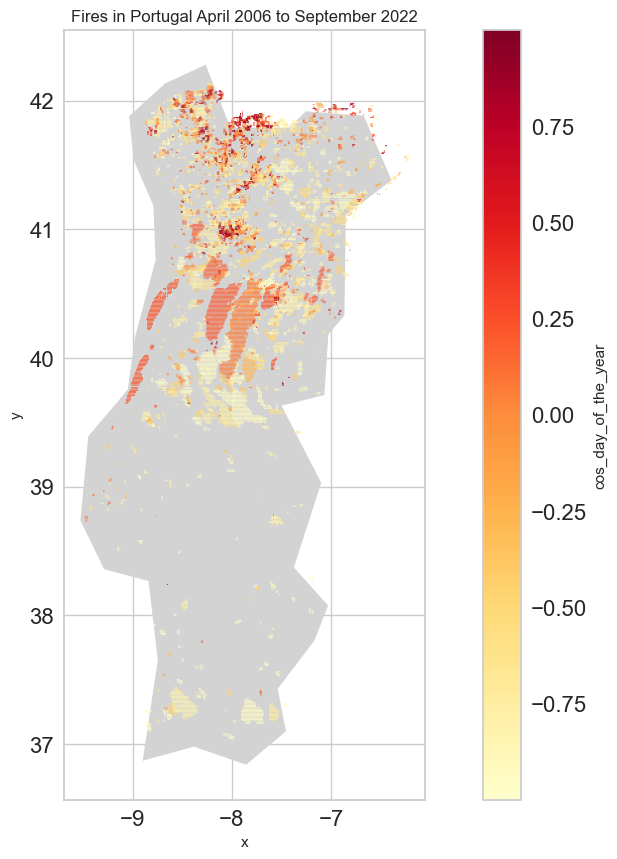

In [133]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years.plot(x="x", y="y", kind="scatter", 
        c="cos_day_of_the_year", colormap="YlOrRd",  s= 0.15,
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
plt.show()

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\598203064.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


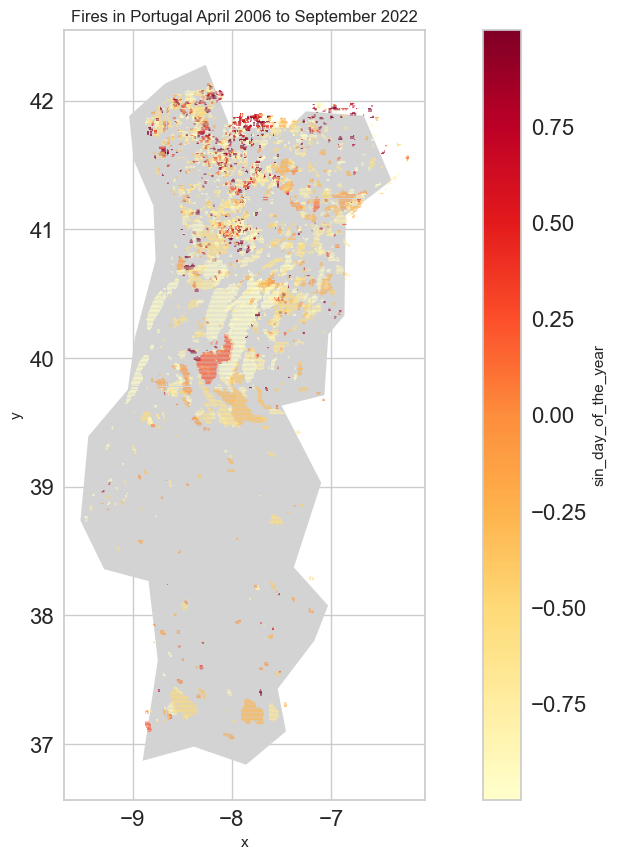

In [134]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years.plot(x="x", y="y", kind="scatter", 
        c="sin_day_of_the_year", colormap="YlOrRd",  s= 0.15,
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
plt.show()

### K Means Clustering

In [30]:
# remove irrelvant columns from the data that will be clustered
# day_of_the_year, month, and day are removed beacuse we already have cosine(day_of_the_year) and sin(day_of_the_year)
# x_int and y_int are remvoed because we already have the accurate x and y coordinates
years_clustering_normalized = normalized_df.copy(deep=True)
years_clustering_normalized = years_clustering_normalized.drop(columns = [ 'day_of_the_year',  'time', 'month', 'day', 'x_int', 'y_int'])
years_clustering_normalized = years_clustering_normalized.fillna(years_clustering_normalized.mean())
years_clustering_normalized

years_clustering= years.copy(deep=True)
years_clustering= years_clustering.drop(columns = [ 'day_of_the_year',  'time', 'month', 'day', 'x_int', 'y_int'])
years_clustering = years_clustering.fillna(years_clustering.mean())
years_clustering

x      y      aspect  burned_areas   curvature         d2m  \
0     -9.48  38.76  218.323290           1.0 -13973.8610  285.286227   
1     -9.48  38.77  238.144700           1.0   4664.3843  285.286227   
2     -9.47  38.73  285.109130           1.0  -2931.3470  285.286227   
3     -9.47  38.74  258.798920           1.0  -5164.5044  285.286227   
4     -9.47  38.75  234.107250           1.0  -6697.9670  285.286227   
...     ...    ...         ...           ...         ...         ...   
29732 -6.22  41.55  106.000244           1.0  -7686.9326  283.891660   
29733 -6.22  41.55  106.000244           1.0  -7686.9326  287.920400   
29734 -6.22  41.56  105.252884           1.0  -2599.2126  283.876650   
29735 -6.22  41.56  105.252884           1.0  -2599.2126  287.894070   
29736 -6.22  41.57  146.803330           1.0   6791.2900  287.867740   

              dem  ignition_points       lai  lc_agriculture  lc_forest  \
0       22.818422              0.0  1.468064        0.061867   0.358775   
1      212.681440              0.0  3.700000        0.222479   0.501165   
2       22.934958              0.0  1.468064        0.094327   0.289674   
3       18.108190              0.0  1.468064        0.055267   0.467525   
4       34.618267              0.0  1.468064        0.077921   0.610518   
...           ...              ...       ...             ...        ...   
29732  656.406300              0.0  0.900000        0.221780   0.177264   
29733  656.406300              0.0  1.000000        0.221780   0.177264   
29734  674.455300              0.0  1.300000        0.560966   0.105398   
29735  674.455300              0.0  1.500000        0.560966   0.105398   
29736  759.976700              0.0  0.700000        0.500783   0.000000   

       lc_grassland  lc_settlement  lc_shrubland  lc_sparse_vegetation  \
0          0.000000       0.000000      0.034659              0.000000   
1          0.000000       0.037123      0.201721              0.000000   
2          0.000000       0.299544      0.000000              0.150371   
3          0.110535       0.000000      0.000000              0.087259   
4          0.012849       0.000000      0.000000              0.000000   
...             ...            ...           ...                   ...   
29732      0.000000       0.000000      0.600956              0.000000   
29733      0.000000       0.000000      0.600956              0.000000   
29734      0.000000       0.000000      0.333636              0.000000   
29735      0.000000       0.000000      0.333636              0.000000   
29736      0.000000       0.000000      0.499217              0.000000   

       lc_water_bodies  lc_wetland     lst_day   lst_night      ndvi  \
0             0.441838    0.102861  305.219579  290.222064  0.542604   
1             0.000000    0.037511  301.220000  291.500000  0.543300   
2             0.166084    0.000000  302.180000  289.720000  0.355900   
3             0.279414    0.000000  305.219579  289.940000  0.542604   
4             0.298713    0.000000  305.219579  290.222064  0.542604   
...                ...         ...         ...         ...       ...   
29732         0.000000    0.000000  314.259980  294.180000  0.394500   
29733         0.000000    0.000000  305.219579  290.222064  0.480000   
29734         0.000000    0.000000  313.759980  293.740000  0.462000   
29735         0.000000    0.000000  305.219579  290.222064  0.522500   
29736         0.000000    0.000000  305.219579  290.222064  0.364900   

       population        rh  roads_distance     slope      smi           sp  \
0        1.502658  0.258952           0.000  1.558401  0.13765  96409.77185   
1       54.910294  0.258952           0.172  1.557888  0.13765  96409.77185   
2       20.905184  0.258952           0.000  1.537272  0.15544  96409.77185   
3        4.693551  0.258952           0.000  1.542442  0.15544  96409.77185   
4        1.748590  0.258952           0.000  1.553220  0.13765  96409.77185   
...           ..

In [41]:
random.seed(1)

c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

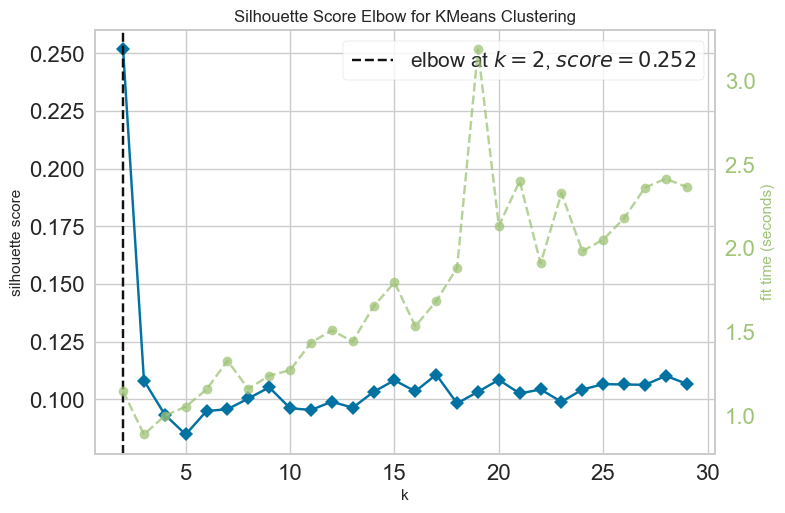

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
model = KMeans()
elb_visualizer = KElbowVisualizer(model ,metric='silhouette', k=(2,30))
elb_visualizer.fit(years_clustering_normalized)
elb_visualizer.show()

c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

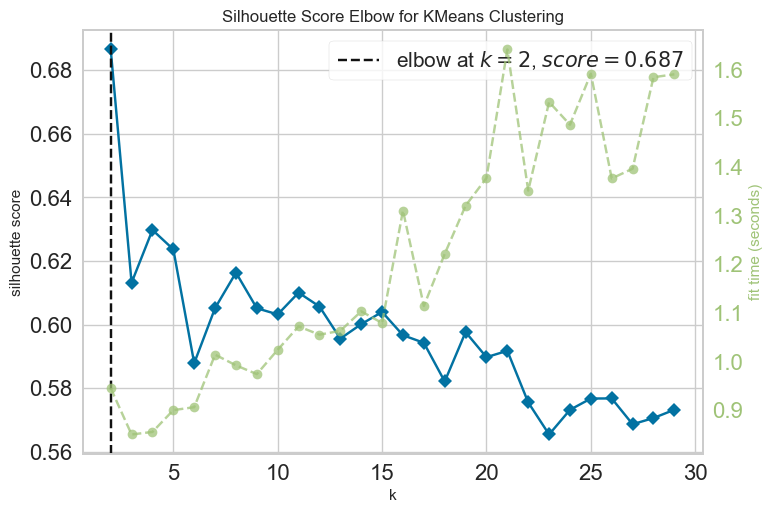

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [33]:
model = KMeans()
elb_visualizer = KElbowVisualizer(model ,metric='silhouette', k=(2,30))
elb_visualizer.fit(years_clustering)
elb_visualizer.show()

In [36]:
years_clustering_normalized_9 = years_clustering_normalized.copy(deep=True)
kmeans = KMeans(9)
kmeans.fit(years_clustering_normalized_9)
years_clustering_normalized_9['cluster'] = kmeans.predict(years_clustering_normalized_9)

c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\asera\AppData\Local\Temp\ipykernel_23292\3137453953.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\3137453953.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\3137453953.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\3137453953.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\3137453953.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use 

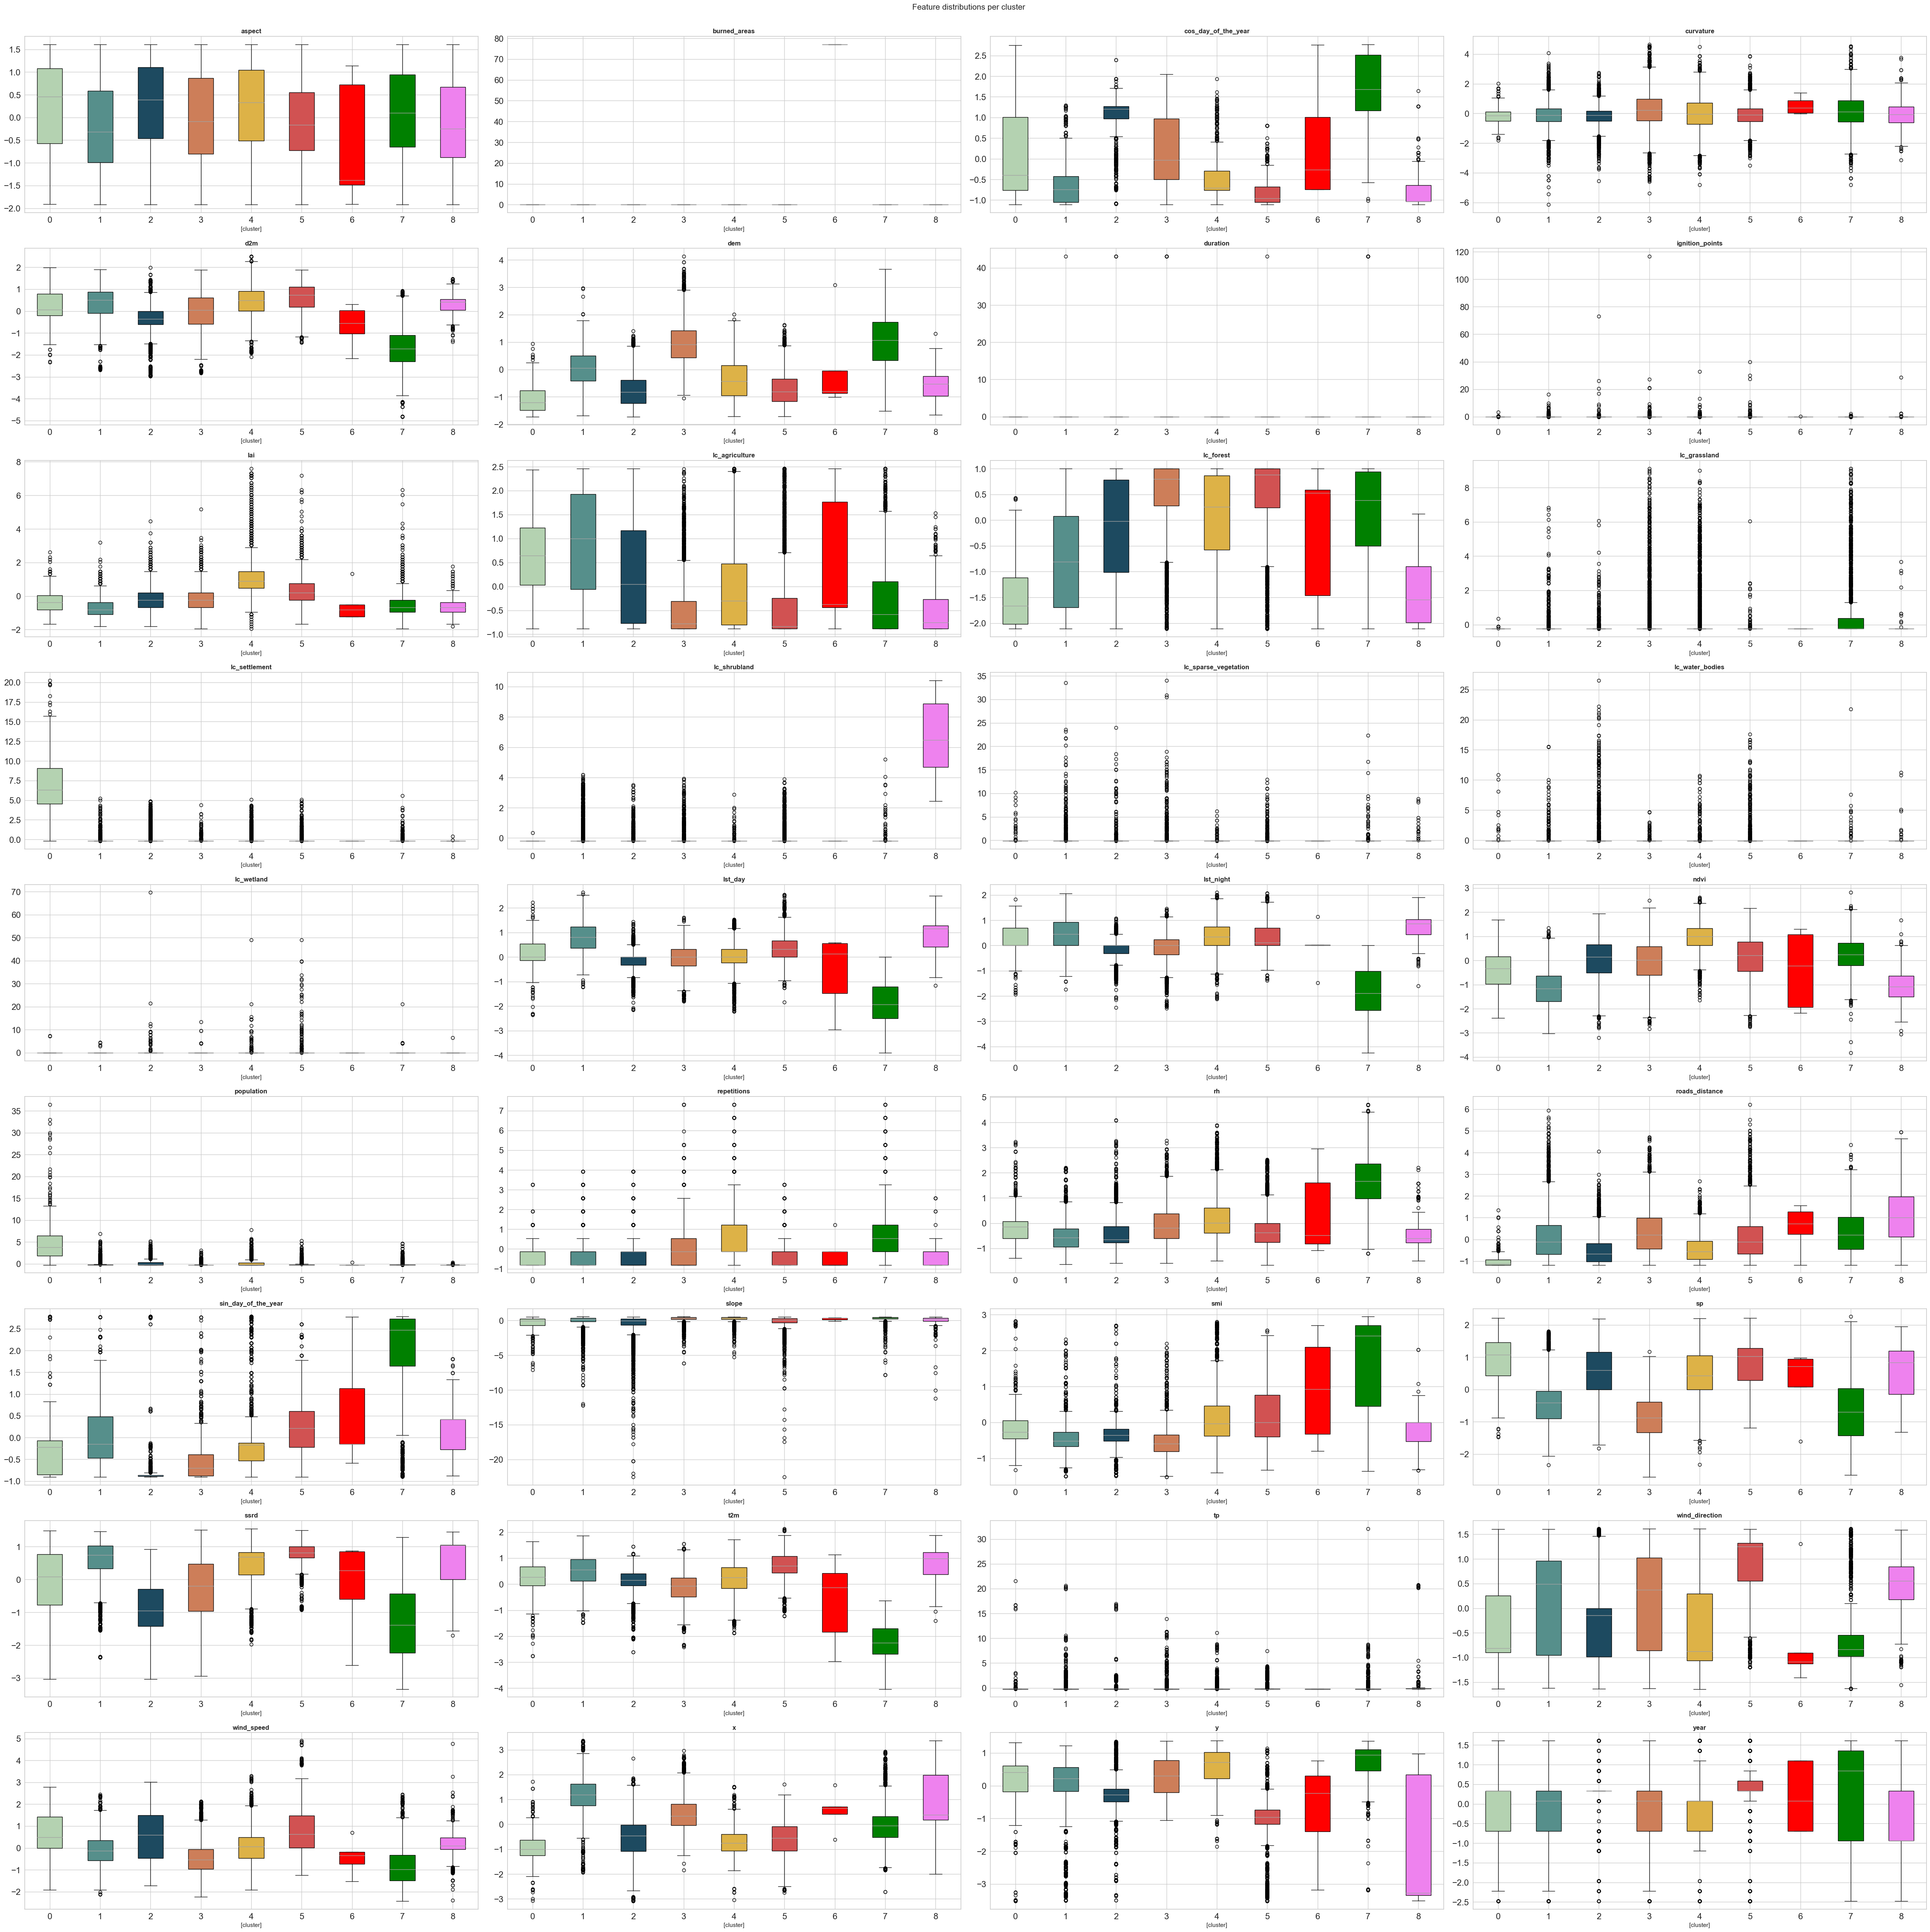

In [42]:
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252', 'red', 'green', 'violet']
years_clustering_normalized_9.columns = years_clustering_normalized_9.columns.get_level_values(0)
cols = years_clustering_normalized.columns.to_list()
features = cols
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(50,50))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = years_clustering_normalized_9[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=15, y=1)   
plt.tight_layout()
plt.show()

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\1700537694.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


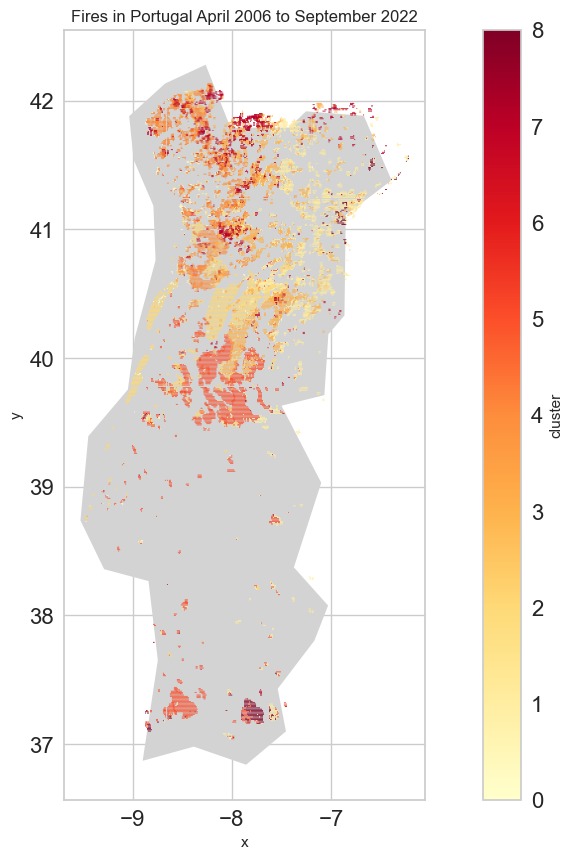

In [130]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years_clustering_normalized_9['x'] = years['x']
years_clustering_normalized_9['y'] = years['y']

years_clustering_normalized_9.plot(x="x", y="y", kind="scatter", 
        c="cluster", colormap="YlOrRd",  s= 0.15,
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
plt.show()

In [37]:
years_clustering_normalized_8 = years_clustering_normalized.copy(deep=True)
kmeans = KMeans(8)
kmeans.fit(years_clustering_normalized_8)
years_clustering_normalized_8['cluster'] = kmeans.predict(years_clustering_normalized_8)

c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\asera\AppData\Local\Temp\ipykernel_23292\1490958966.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\1490958966.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\1490958966.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\1490958966.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\1490958966.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use 

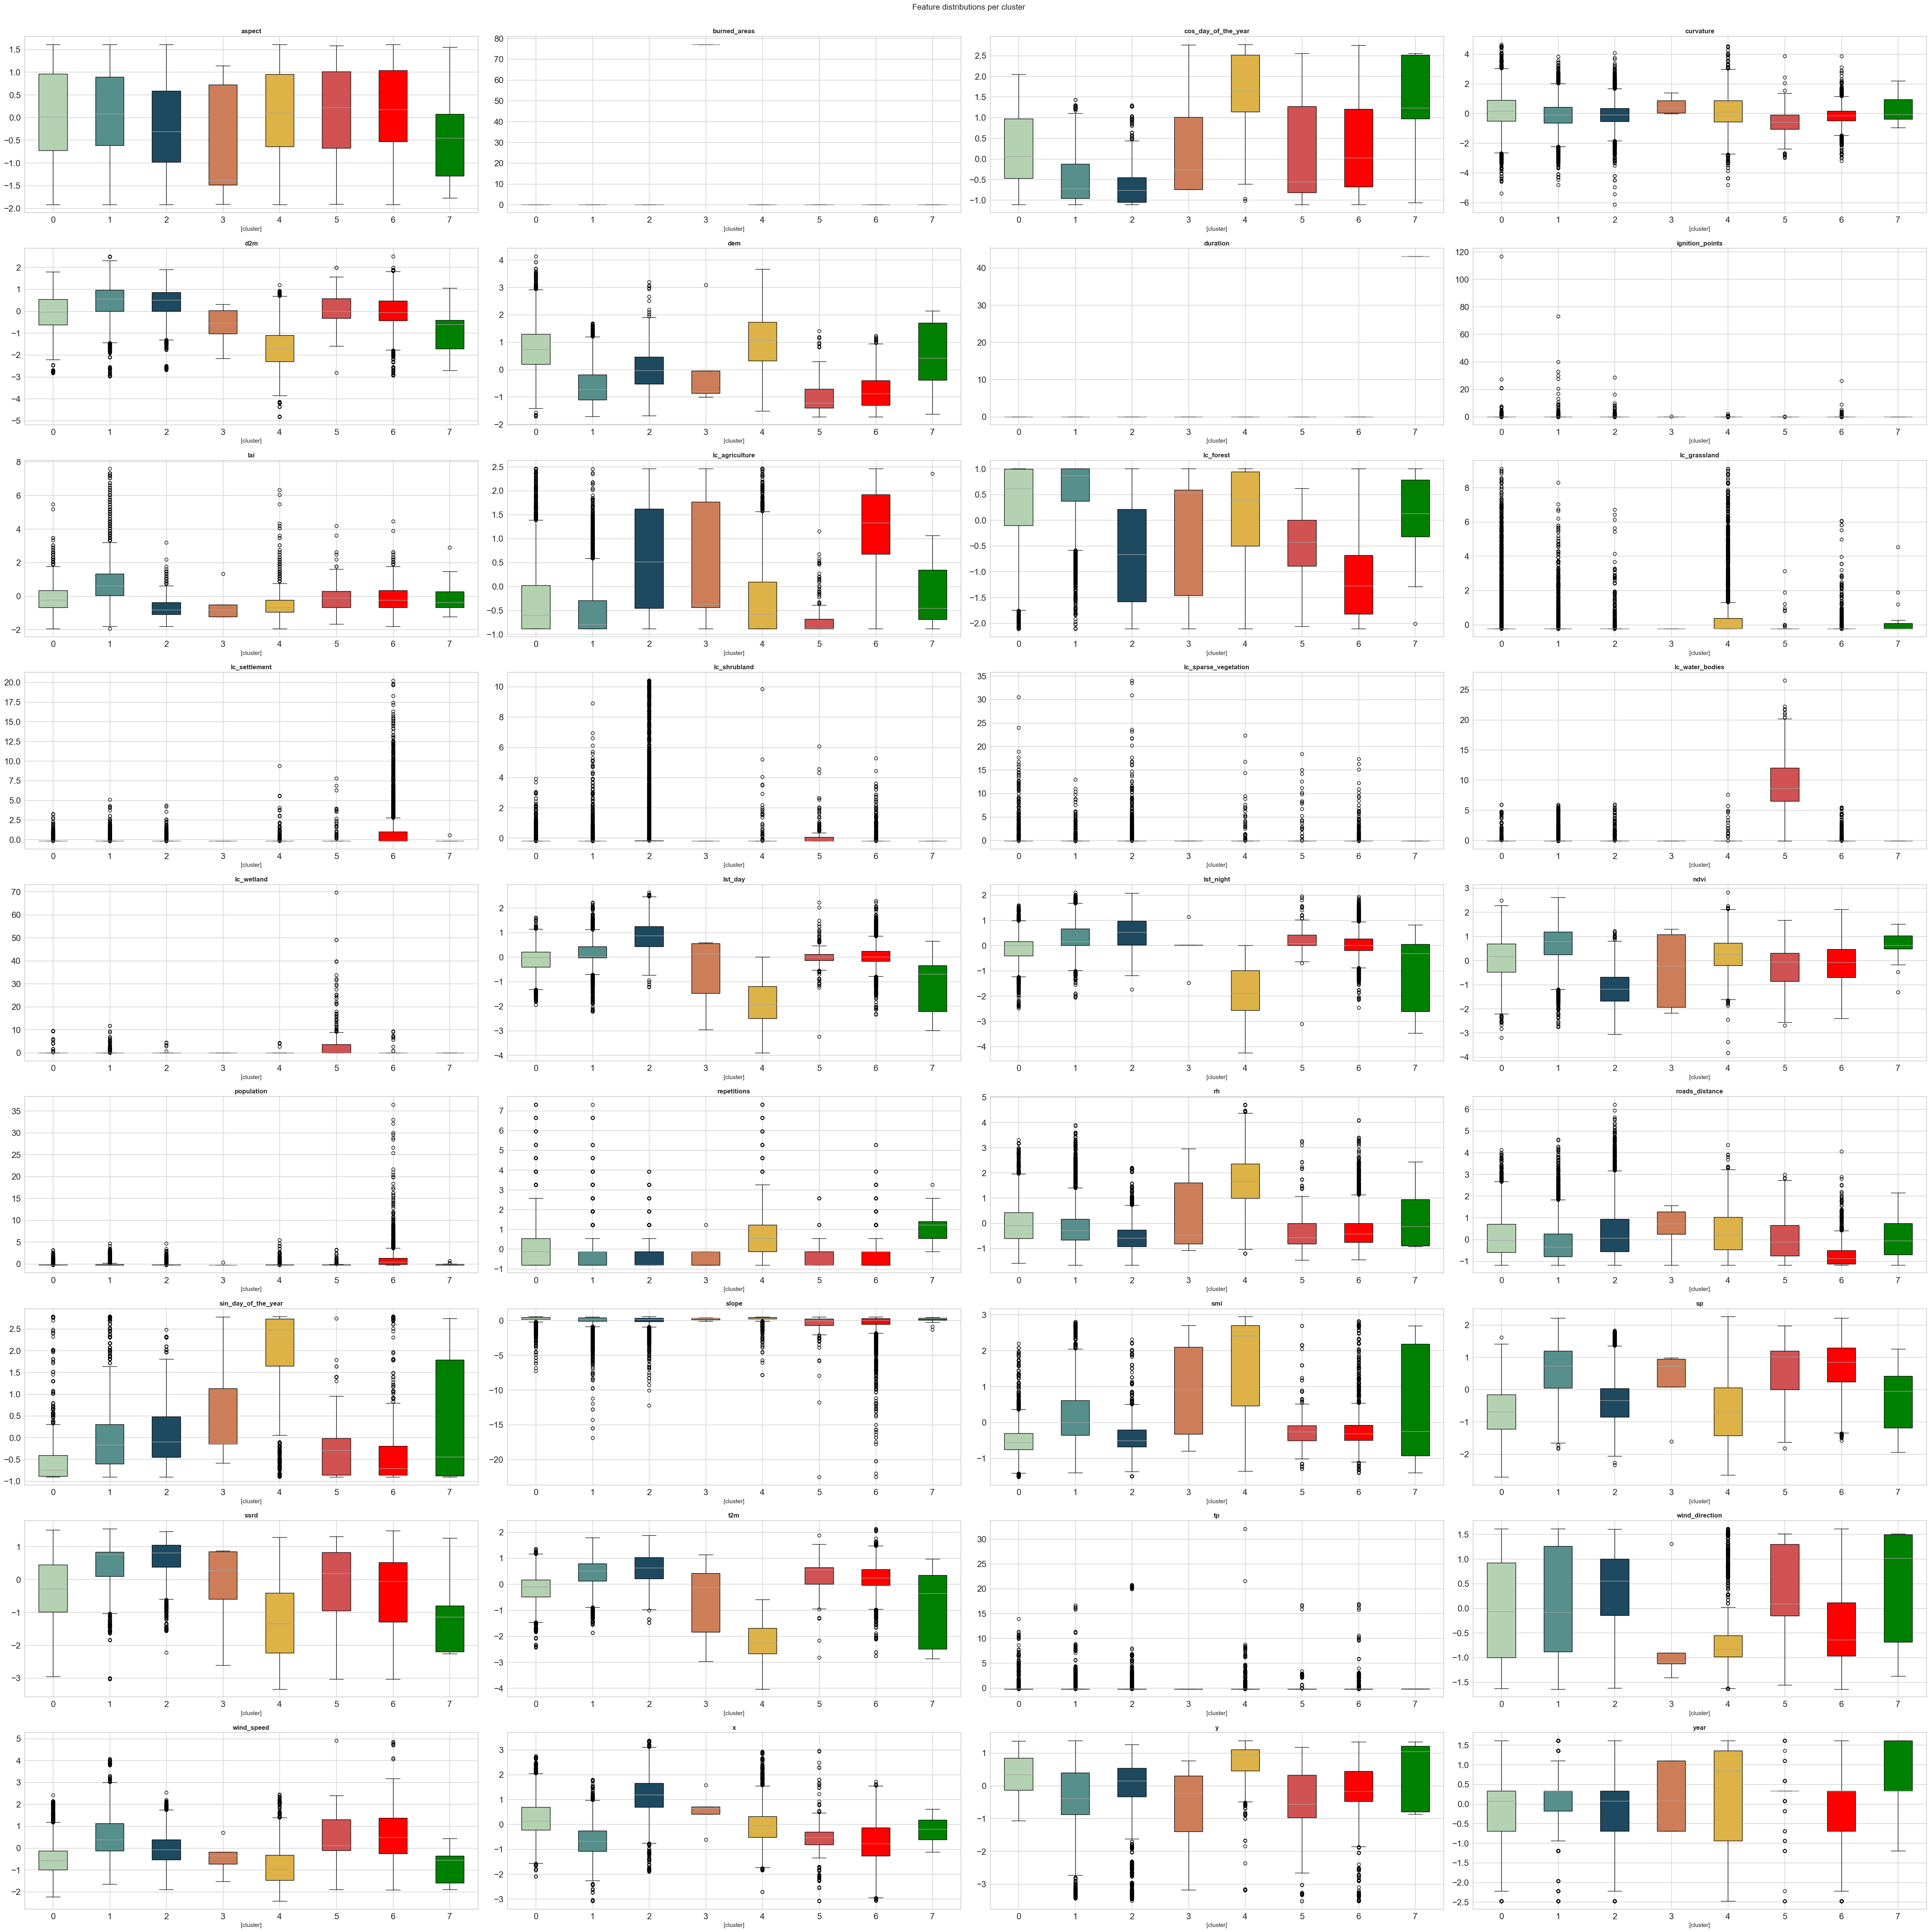

In [43]:
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252', 'red', 'green']
years_clustering_normalized_8.columns = years_clustering_normalized_8.columns.get_level_values(0)
cols = years_clustering_normalized.columns.to_list()
features = cols
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(50,50))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = years_clustering_normalized_8[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=15, y=1)   
plt.tight_layout()
plt.show()

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\2606351070.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


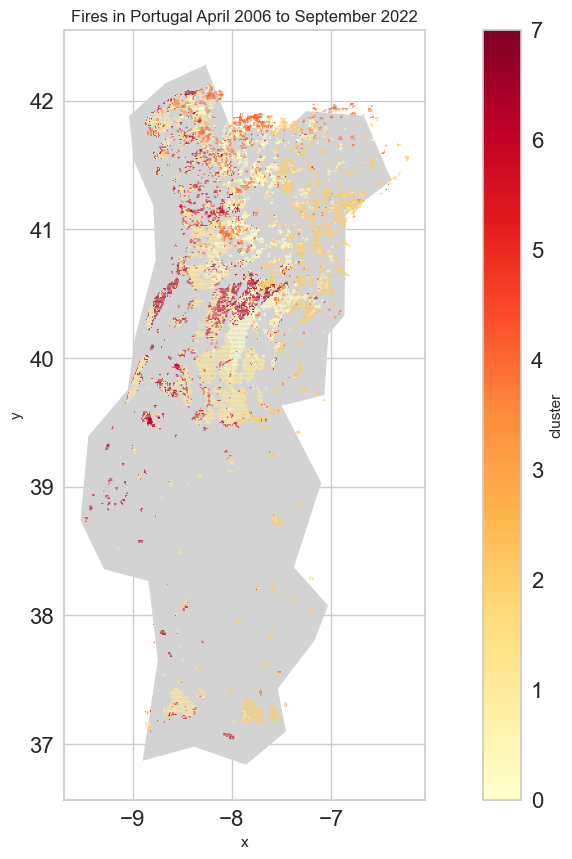

In [131]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years_clustering_normalized_8['x'] = years['x']
years_clustering_normalized_8['y'] = years['y']

years_clustering_normalized_8.plot(x="x", y="y", kind="scatter", 
        c="cluster", colormap="YlOrRd",  s= 0.15,
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
plt.show()

In [59]:
years_clustering_normalized_4 = years_clustering_normalized.copy(deep=True)
kmeans = KMeans(4)
kmeans.fit(years_clustering_normalized_4)
years_clustering_normalized_4['cluster'] = kmeans.predict(years_clustering_normalized_4)

c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\asera\AppData\Local\Temp\ipykernel_23292\4132122780.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\4132122780.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\4132122780.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\4132122780.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\4132122780.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use 

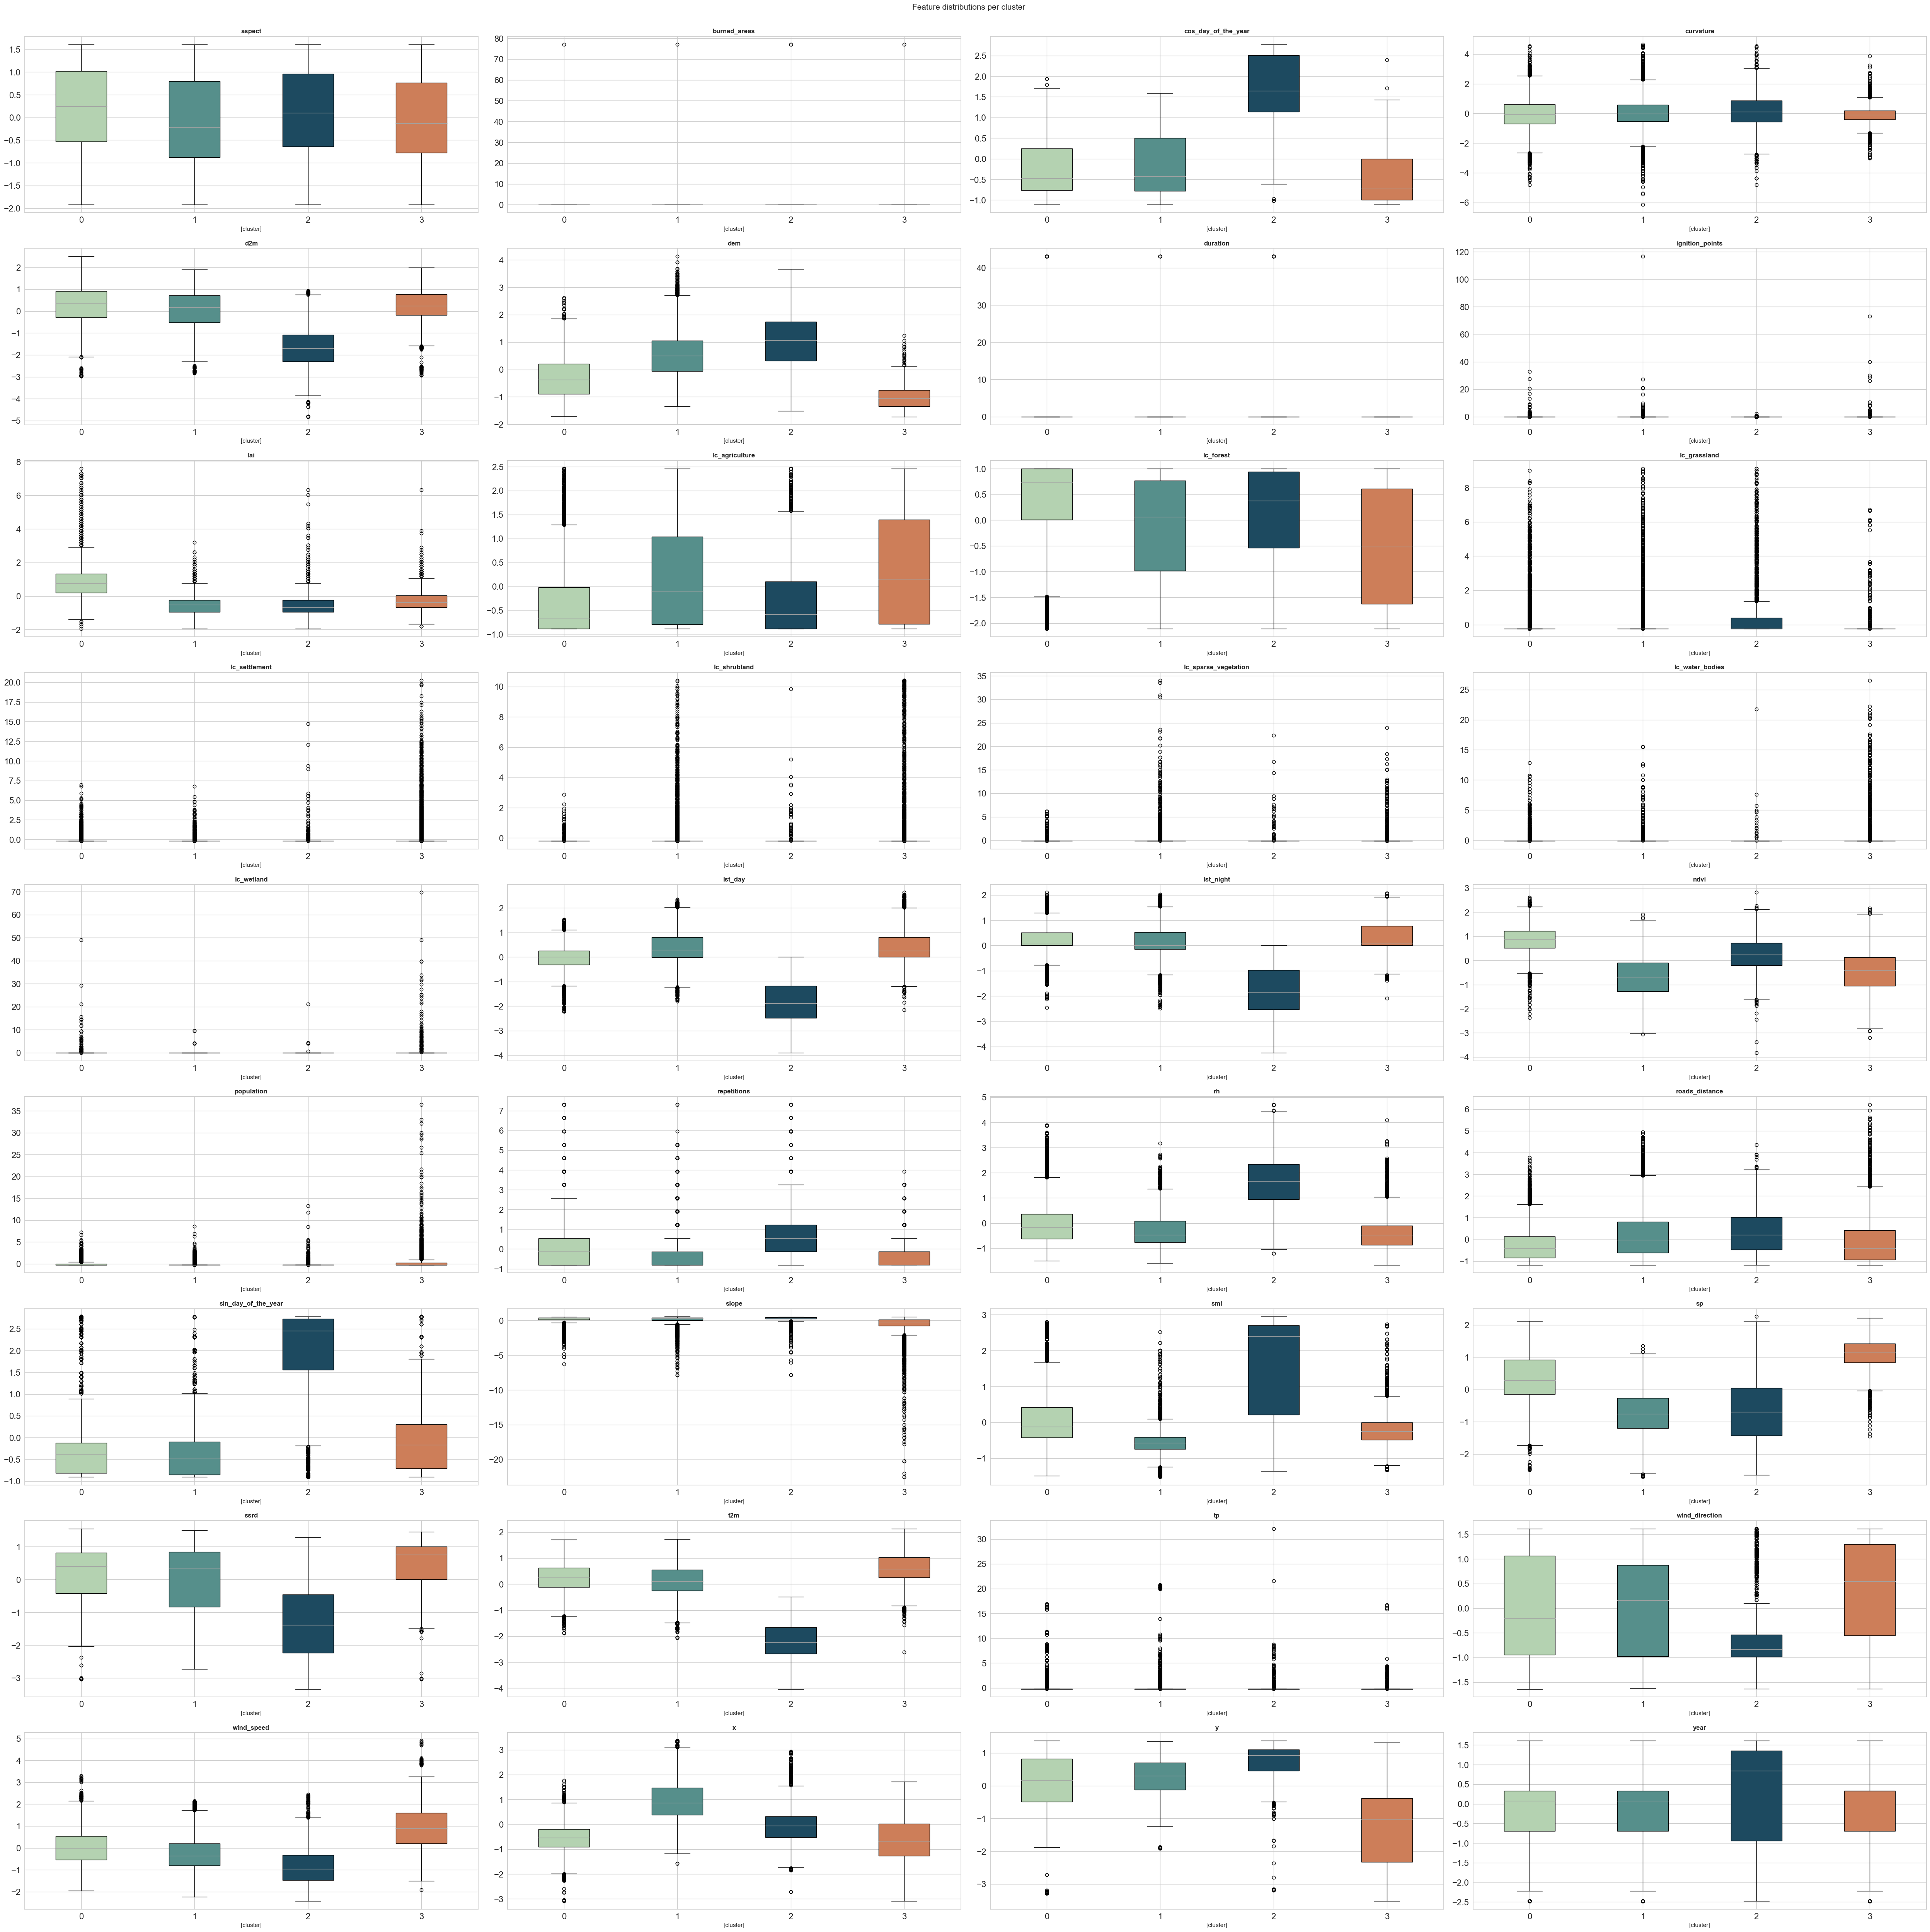

In [60]:
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59']
years_clustering_normalized_4.columns = years_clustering_normalized_4.columns.get_level_values(0)
cols = years_clustering_normalized.columns.to_list()
features = cols
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(50,50))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = years_clustering_normalized_4[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=15, y=1)   
plt.tight_layout()
plt.show()

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\1905909987.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


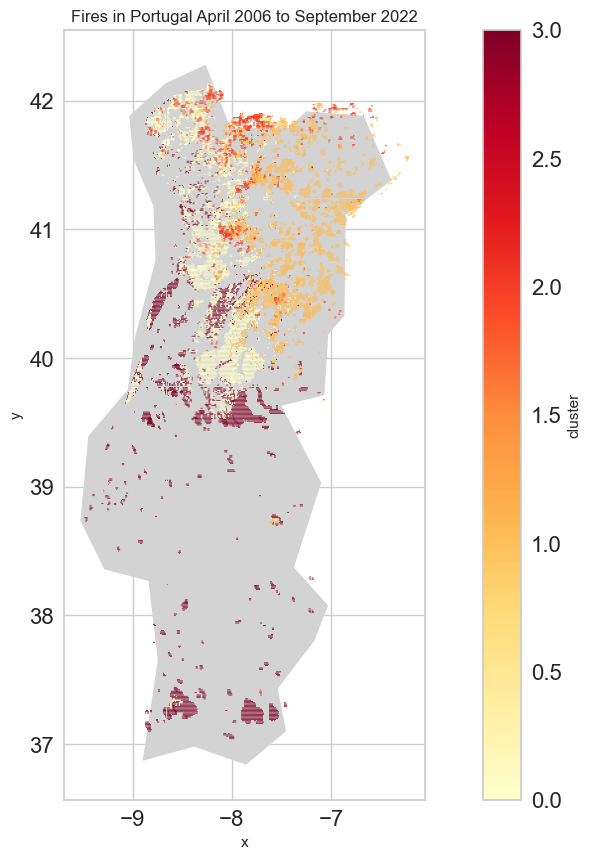

In [128]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
years_clustering_normalized_4['x'] = years['x']
years_clustering_normalized_4['y'] = years['y']

years_clustering_normalized_4.plot(x="x", y="y", kind="scatter", 
        c="cluster", colormap="YlOrRd",  s= 0.15,
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
plt.show()

### K Means Robustness Test

C:\Users\asera\AppData\Local\Temp\ipykernel_23292\285440921.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\285440921.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\285440921.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\285440921.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in box.iteritems():
C:\Users\asera\AppData\Local\Temp\ipykernel_23292\285440921.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .item

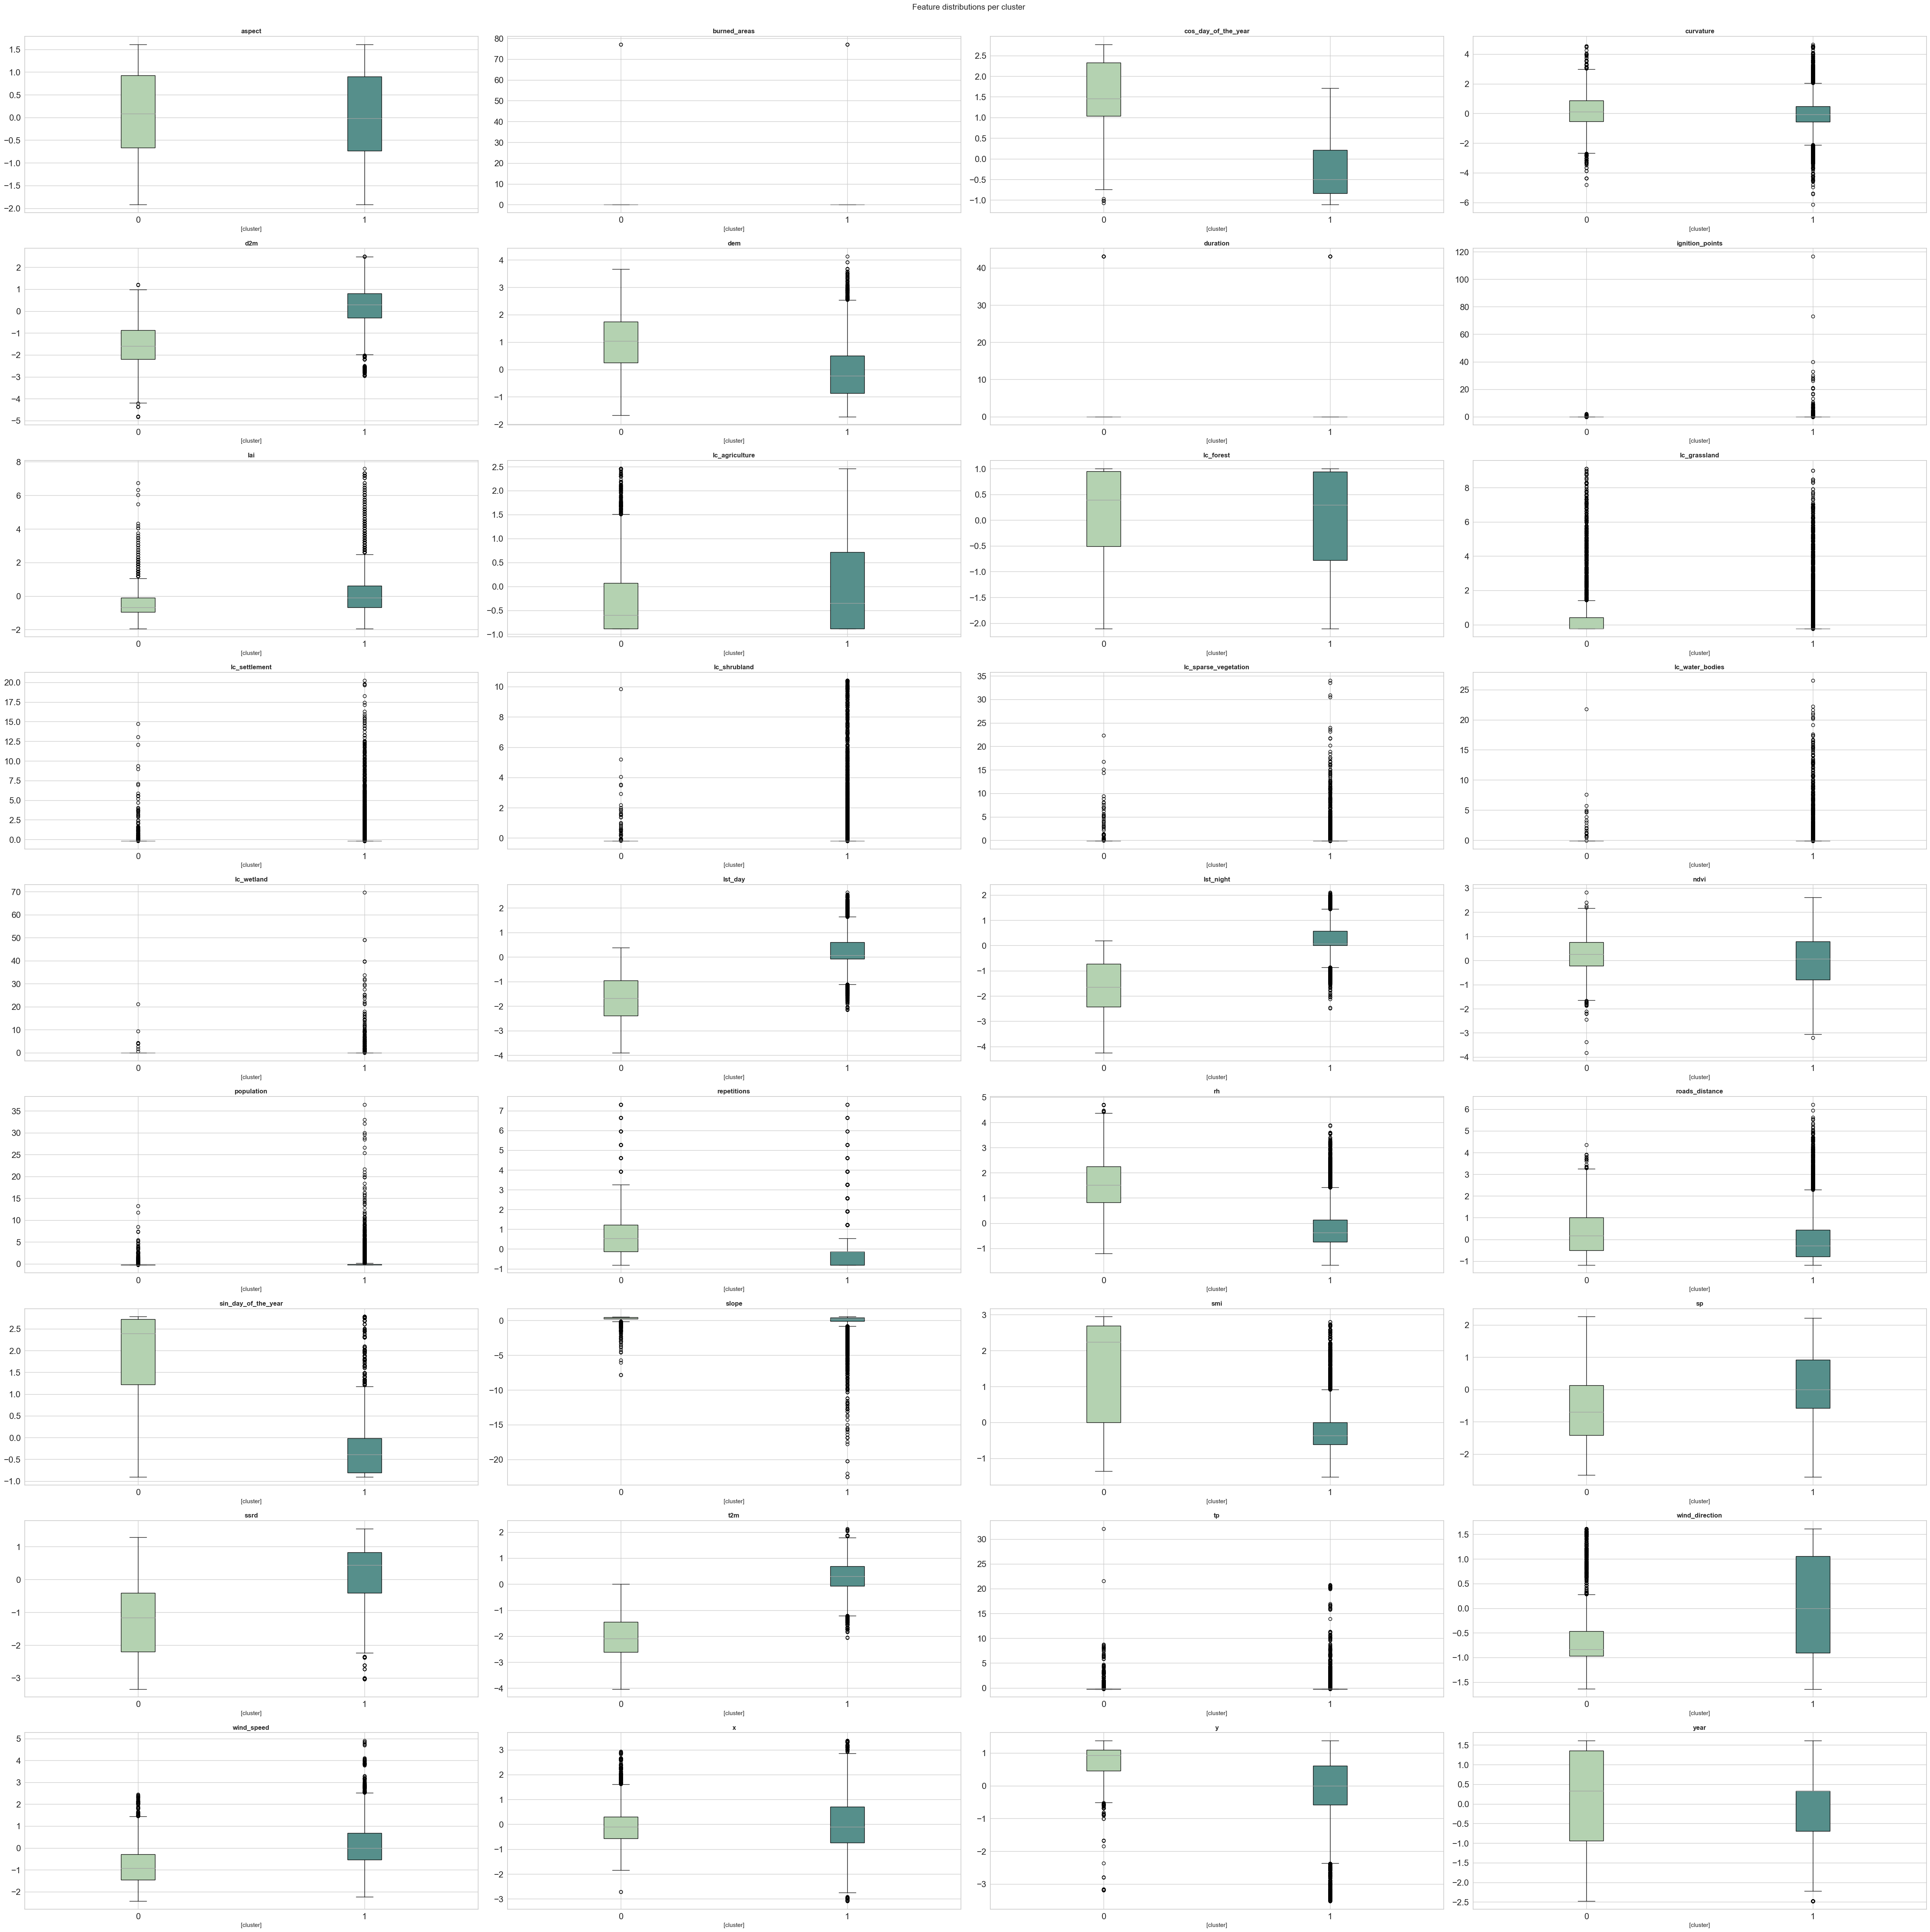

In [82]:
years_clustering_normalized_robust = years_clustering_normalized.copy(deep=True)
kmeans = KMeans(n_clusters=2, init='k-means++', n_init = 10, algorithm = 'lloyd')
kmeans.fit(years_clustering_normalized_robust)
years_clustering_normalized_robust['cluster'] = kmeans.predict(years_clustering_normalized_robust)


cluster_colors = ['#b4d2b1', '#568f8b']
years_clustering_normalized_robust.columns = years_clustering_normalized_robust.columns.get_level_values(0)
cols = years_clustering_normalized.columns.to_list()
features = cols
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(50,50))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = years_clustering_normalized_robust[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=15, y=1)   
plt.tight_layout()
plt.show()


In [124]:
d0 = dict.fromkeys(cols,[])
d1 = dict.fromkeys(cols,[])
for val in cols:
    d0[val] = []
    d1[val] = []
years_clustering_normalized_robust = years_clustering_normalized.copy(deep=True)
for i in range(1, 100, 10):
    for algo in ['lloyd', 'elkan', 'auto', 'full']:
        for init_ in ['k-means++', 'random']:
            kmeans = KMeans(n_clusters=2, init= init_, n_init = i, algorithm = algo)
            kmeans.fit(years_clustering_normalized_robust)
            years_clustering_normalized_robust['cluster'] = kmeans.predict(years_clustering_normalized_robust)
            
            d0_temp = years_clustering_normalized_robust[years_clustering_normalized_robust["cluster"] == 0].median().to_dict()
            d1_temp = years_clustering_normalized_robust[years_clustering_normalized_robust["cluster"] == 1].median().to_dict()
            
            if d0_temp['cos_day_of_the_year'] > d1_temp['cos_day_of_the_year']:
                for val in cols:
                    d0[val].append(d0_temp[val])
                    d1[val].append(d1_temp[val])
            else:
                for val in cols:
                    d1[val].append(d0_temp[val])
                    d0[val].append(d1_temp[val])
            years_clustering_normalized_robust.drop(columns=['cluster'])

c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' i

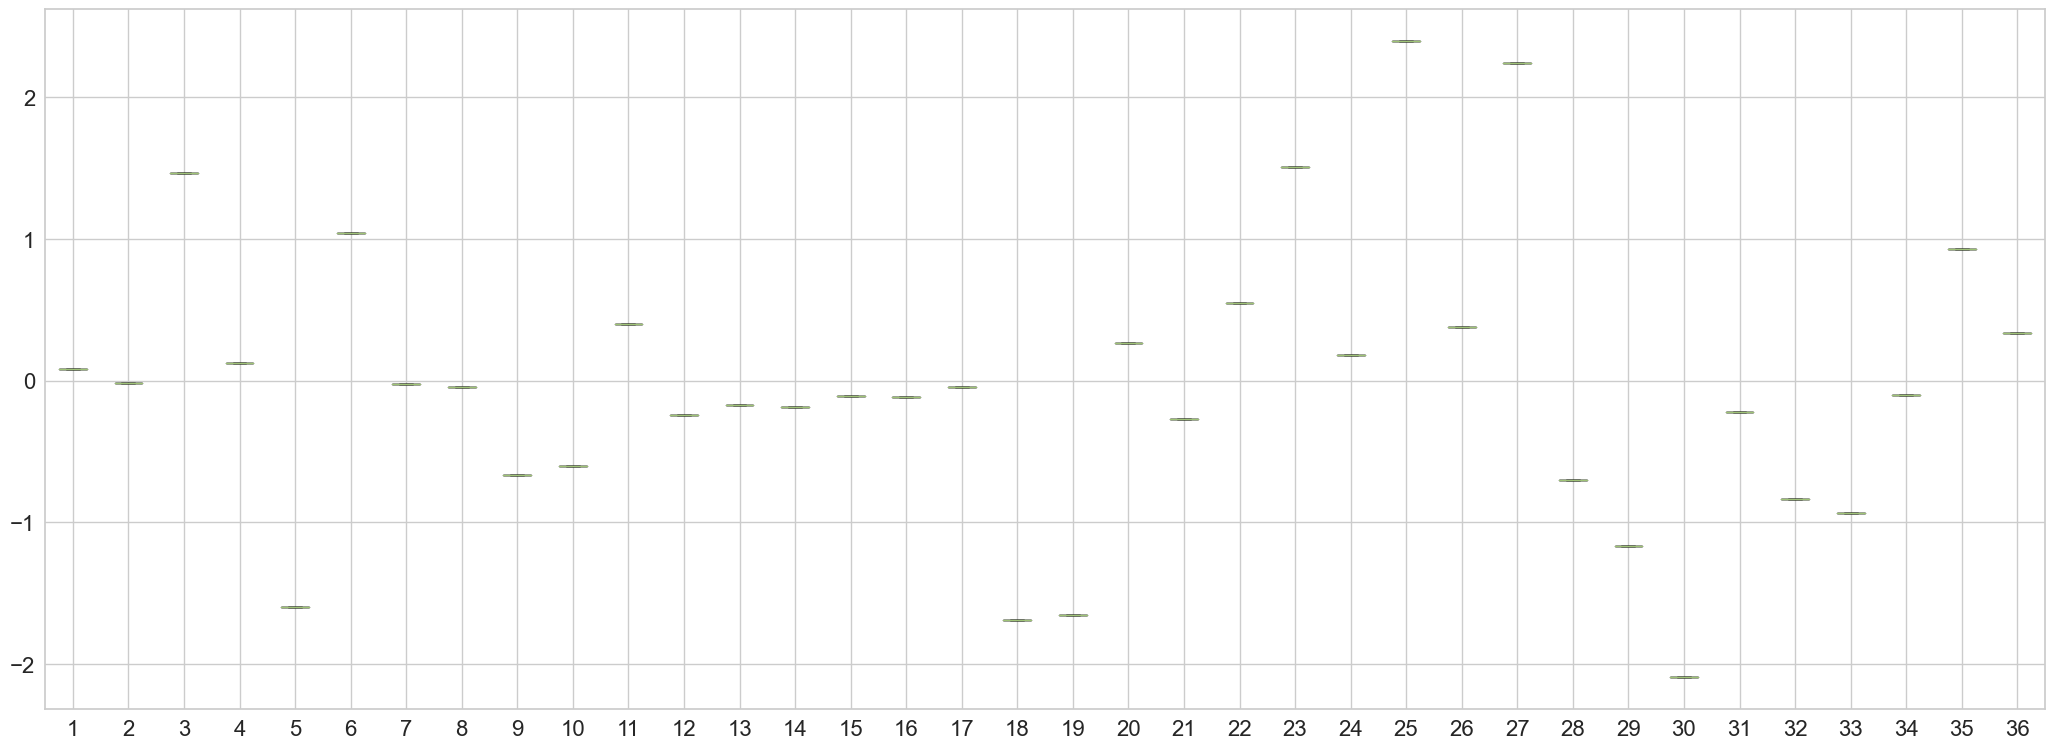

In [125]:
data_0 = []
for val in cols:
    data_0.append(d0[val])
fig = plt.figure(figsize =(20, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data_0)
# show plot
plt.show()

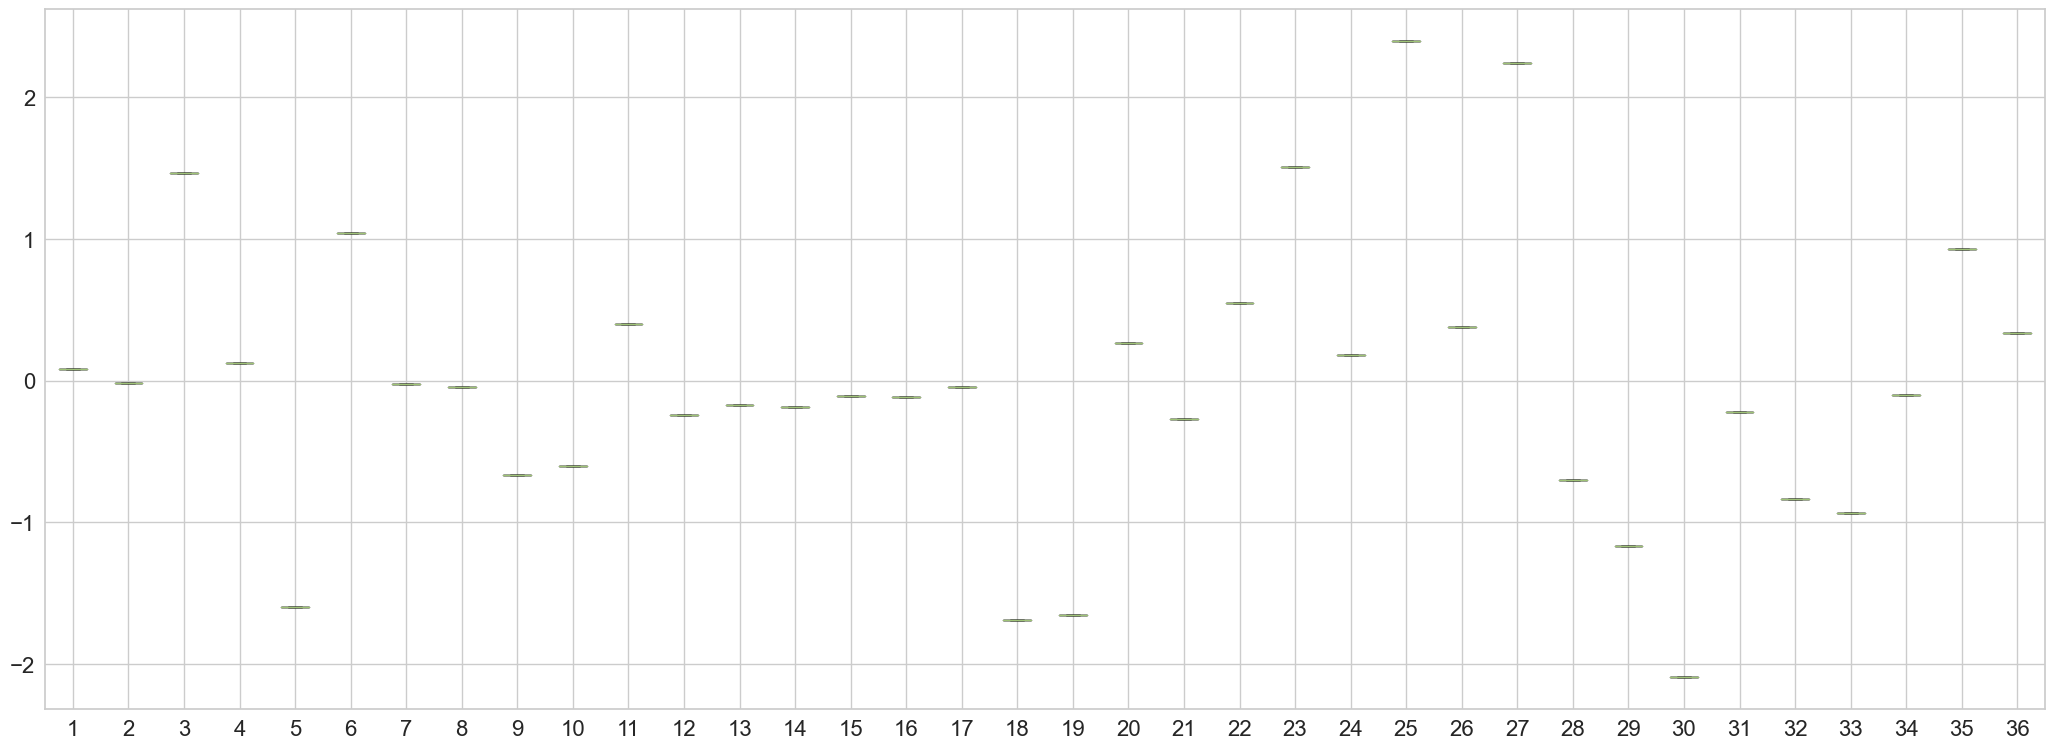

In [126]:
data_1 = []
for val in cols:
    data_1.append(d0[val])
fig = plt.figure(figsize =(20, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data_1)
# show plot
plt.show()